In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [2]:
dir="C:/Users/Expedition/Desktop/expedition2024/"

In [3]:
v1 = ert.load(dir + '10Aug/p02_v1_ws.dat')
h1 = ert.load(dir + '11Aug/p02_h1_ws.dat')
h1w = ert.load(dir + '11Aug/p02_h1w_ws_hd.dat')
h1e = ert.load(dir + '11Aug/p02_h1e_ws_hd.dat')
camp1 = ert.load(dir + '12Aug/p02_camp_along_shore_ws.dat')
camp2 = ert.load(dir + '12Aug/p02_camp_perp_shore_ws.dat')
camp3 = ert.load(dir + '12Aug/p02_camp_perp_pit_ws.dat')
parsons = [v1, h1, h1w, h1e, camp1, camp2, camp3]

16/08/24 - 04:14:49 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


16/08/24 - 04:14:49 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
16/08/24 - 04:14:49 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
16/08/24 - 04:14:49 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
16/08/24 - 04:14:49 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
16/08/24 - 04:14:49 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
16/08/24 - 04:14:49 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


In [4]:
def geom_error(data):
    # Set sensor positions
    data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))

    # Create geometric factors and add to the data
    data['k'] = ert.createGeometricFactors(data, numerical=True)

    # Create an ERT Manager instance
    mgr = ert.ERTManager(sr=False)

    # Calculate the geometric factors without numerical option
    k0 = ert.createGeometricFactors(data)

    data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)


    return data, mgr, k0


In [5]:

for item in parsons:
 geom_error(item)

16/08/24 - 04:14:58 - pyGIMLi - INFO - Cache C:\Users\Expedition\gimli\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (9.0s x 4): C:\Users\Expedition\AppData\Roaming\pygimli\Cache\12604052167832092202
16/08/24 - 04:14:58 - pyGIMLi - INFO - Cache C:\Users\Expedition\gimli\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 6): C:\Users\Expedition\AppData\Roaming\pygimli\Cache\10015697749716419079
16/08/24 - 04:14:58 - pyGIMLi - INFO - Cache C:\Users\Expedition\gimli\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (10.0s x 3): C:\Users\Expedition\AppData\Roaming\pygimli\Cache\13437851619664690097
16/08/24 - 04:14:58 - pyGIMLi - INFO - Cache C:\Users\Expedition\gimli\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 3): C:\Users\Expedition\AppData\Roaming\pygimli\Cache\14730666224818513080
16/08/24 - 04:14:58 - pyGIMLi - INFO - Cache C:\Users\Expedition\gimli\gimli\pygimli\physics\ert\ert.py:createGeometricFact

14/08/24 - 19:58:17 - pyGIMLi - INFO - Found 2 regions.
14/08/24 - 19:58:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/08/24 - 19:58:17 - pyGIMLi - INFO - Found 2 regions.
14/08/24 - 19:58:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/08/24 - 19:58:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/08/24 - 19:58:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/08/24 - 19:58:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2615 Cells: 4872 Boundaries: 3832
14/08/24 - 19:58:17 - pyGIMLi - INFO - Use median(data values)=817.4
14/08/24 - 19:58:17 - pyGIMLi - INFO - Created startmodel from forward operator: 1007, min/max=817.400000/817.400000
14/08/24 - 19:58:17 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000219198D6980>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002191956EA70>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002191958B970>
min/max (data): 102/3203
min/max (error): 3%/3.01%
min/max (start model): 817/817
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  844.83
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   43.63 (dPhi = 94.44%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   21.56 (dPhi = 46.15%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.40 (dPhi = 71.42%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.00 (dPhi = 5.36%) lam: 20.0
-----------------

14/08/24 - 19:58:37 - pyGIMLi - INFO - Found 2 regions.
14/08/24 - 19:58:37 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/08/24 - 19:58:37 - pyGIMLi - INFO - Found 2 regions.
14/08/24 - 19:58:37 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/08/24 - 19:58:37 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/08/24 - 19:58:37 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/08/24 - 19:58:37 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2615 Cells: 4872 Boundaries: 3832
14/08/24 - 19:58:37 - pyGIMLi - INFO - Use median(data values)=653.549
14/08/24 - 19:58:37 - pyGIMLi - INFO - Created startmodel from forward operator: 1007, min/max=653.549000/653.549000
14/08/24 - 19:58:37 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002197FCB1B70>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000219260AB560>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000219260ABD80>
min/max (data): 49.25/2167
min/max (error): 3%/3.01%
min/max (start model): 654/654
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1053.87
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   90.63 (dPhi = 91.02%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   51.10 (dPhi = 38.65%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    5.14 (dPhi = 74.95%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    4.46 (dPhi = 8.18%) lam: 20.0
---------------

14/08/24 - 19:59:02 - pyGIMLi - INFO - Found 2 regions.
14/08/24 - 19:59:02 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/08/24 - 19:59:02 - pyGIMLi - INFO - Found 2 regions.
14/08/24 - 19:59:02 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/08/24 - 19:59:02 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/08/24 - 19:59:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/08/24 - 19:59:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1352 Cells: 2492 Boundaries: 1974
14/08/24 - 19:59:03 - pyGIMLi - INFO - Use median(data values)=28.806
14/08/24 - 19:59:03 - pyGIMLi - INFO - Created startmodel from forward operator: 412, min/max=28.806000/28.806000
14/08/24 - 19:59:03 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002192F61EDE0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000021926121F30>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002192F61E890>
min/max (data): 12.37/97.54
min/max (error): 3.01%/3.01%
min/max (start model): 28.81/28.81
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  405.05
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   22.47 (dPhi = 93.01%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.23 (dPhi = 63.02%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.50 (dPhi = 8.65%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.50 (dPhi = -0.01%) lam: 20.0
#######

14/08/24 - 19:59:08 - pyGIMLi - INFO - Found 2 regions.
14/08/24 - 19:59:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/08/24 - 19:59:08 - pyGIMLi - INFO - Found 2 regions.
14/08/24 - 19:59:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/08/24 - 19:59:08 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/08/24 - 19:59:08 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/08/24 - 19:59:08 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1352 Cells: 2492 Boundaries: 1974
14/08/24 - 19:59:08 - pyGIMLi - INFO - Use median(data values)=150.824
14/08/24 - 19:59:08 - pyGIMLi - INFO - Created startmodel from forward operator: 412, min/max=150.824000/150.824000
14/08/24 - 19:59:08 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002192FCC8FE0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002192FBE1F30>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002192FCC8C20>
min/max (data): 27.16/526
min/max (error): 3%/3.01%
min/max (start model): 151/151
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  878.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   60.00 (dPhi = 92.20%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    7.13 (dPhi = 68.20%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    6.77 (dPhi = 11.25%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    5.46 (dPhi = 1.88%) lam: 20.0
################

14/08/24 - 19:59:13 - pyGIMLi - INFO - Found 2 regions.
14/08/24 - 19:59:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/08/24 - 19:59:13 - pyGIMLi - INFO - Found 2 regions.
14/08/24 - 19:59:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/08/24 - 19:59:13 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/08/24 - 19:59:13 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/08/24 - 19:59:13 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1973 Cells: 3664 Boundaries: 2888
14/08/24 - 19:59:14 - pyGIMLi - INFO - Use median(data values)=404.525
14/08/24 - 19:59:14 - pyGIMLi - INFO - Created startmodel from forward operator: 679, min/max=404.525000/404.525000
14/08/24 - 19:59:14 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000219302EBBA0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002192F799F30>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000219302EBCE0>
min/max (data): 135/1473
min/max (error): 3%/3.01%
min/max (start model): 405/405
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  443.52
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    9.35 (dPhi = 97.14%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    3.83 (dPhi = 45.32%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.96 (dPhi = 24.29%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.05 (dPhi = 15.62%) lam: 20.0
----------------

14/08/24 - 19:59:24 - pyGIMLi - INFO - Found 2 regions.
14/08/24 - 19:59:24 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/08/24 - 19:59:24 - pyGIMLi - INFO - Found 2 regions.
14/08/24 - 19:59:24 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/08/24 - 19:59:24 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/08/24 - 19:59:24 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/08/24 - 19:59:24 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1973 Cells: 3664 Boundaries: 2888
14/08/24 - 19:59:24 - pyGIMLi - INFO - Use median(data values)=362.924
14/08/24 - 19:59:24 - pyGIMLi - INFO - Created startmodel from forward operator: 679, min/max=362.924000/362.924000
14/08/24 - 19:59:24 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000219308D5490>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002192FCC9F30>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000219309B4A40>
min/max (data): 91.47/1158
min/max (error): 3%/3%
min/max (start model): 363/363
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  540.01
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   51.55 (dPhi = 89.67%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    9.20 (dPhi = 71.30%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.97 (dPhi = 41.65%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.05 (dPhi = 0.69%) lam: 20.0
##################

14/08/24 - 19:59:33 - pyGIMLi - INFO - Found 2 regions.
14/08/24 - 19:59:33 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/08/24 - 19:59:33 - pyGIMLi - INFO - Found 2 regions.
14/08/24 - 19:59:33 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/08/24 - 19:59:33 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/08/24 - 19:59:33 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/08/24 - 19:59:33 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1352 Cells: 2492 Boundaries: 1974
14/08/24 - 19:59:33 - pyGIMLi - INFO - Use median(data values)=772.659
14/08/24 - 19:59:33 - pyGIMLi - INFO - Created startmodel from forward operator: 412, min/max=772.659000/772.659000
14/08/24 - 19:59:33 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002197EC68400>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000021930359F30>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000219307D2840>
min/max (data): 300/1564
min/max (error): 3%/3%
min/max (start model): 773/773
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  305.79
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   25.96 (dPhi = 89.94%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    3.52 (dPhi = 64.36%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    3.61 (dPhi = 1.70%) lam: 20.0
################################################################################
#                 Abort criterion reached: dPhi = 1.7 (< 2.0%)              

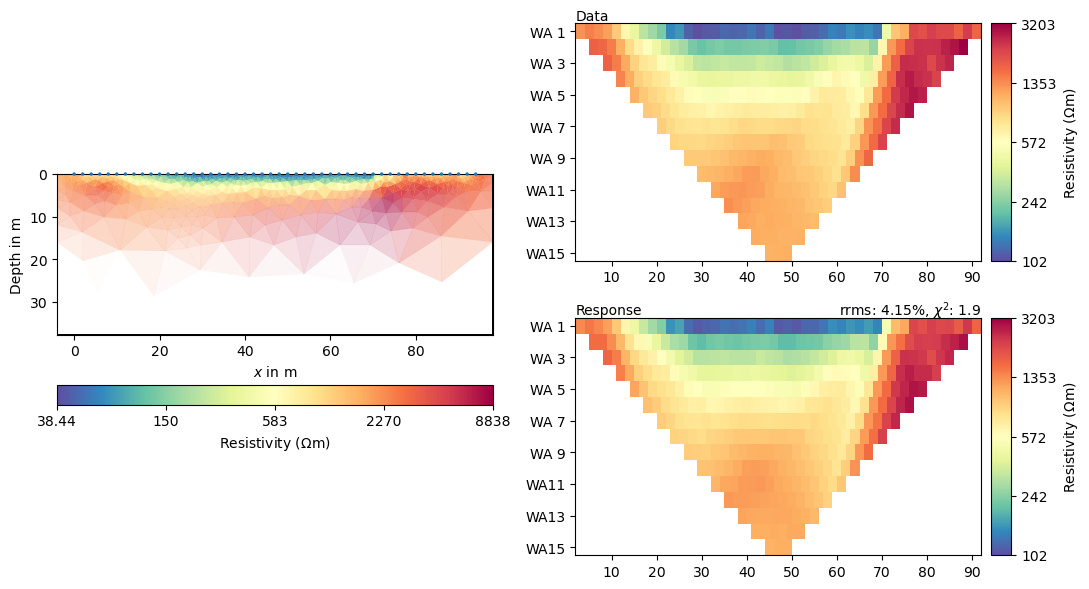

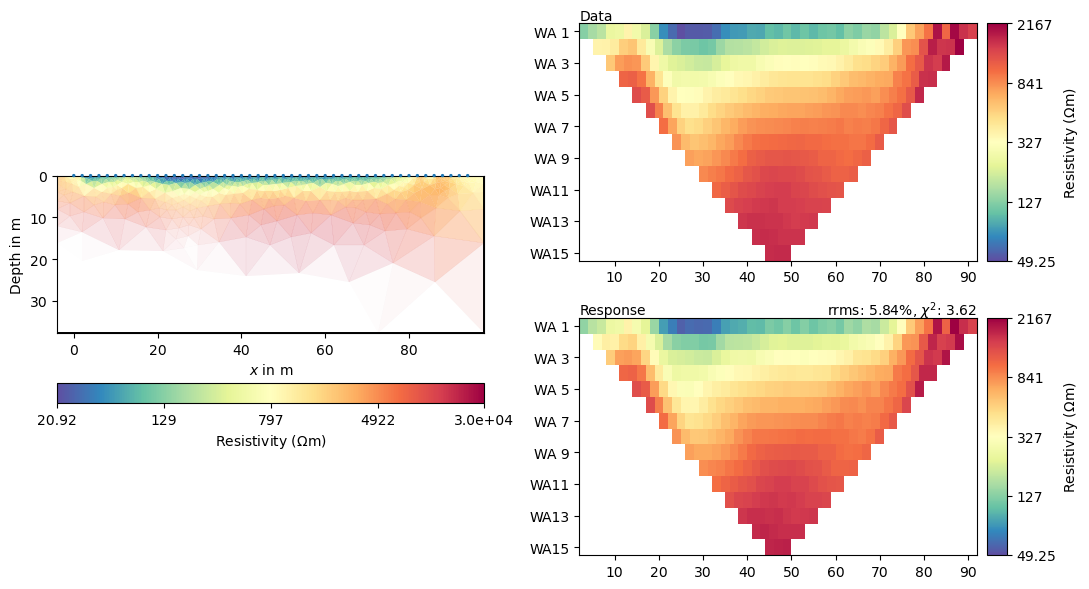

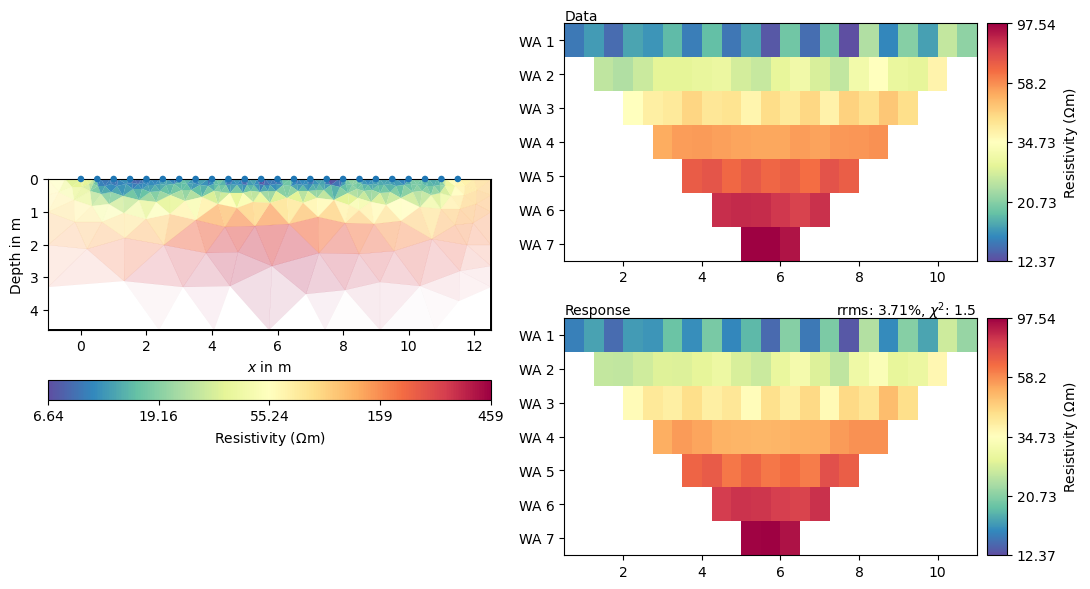

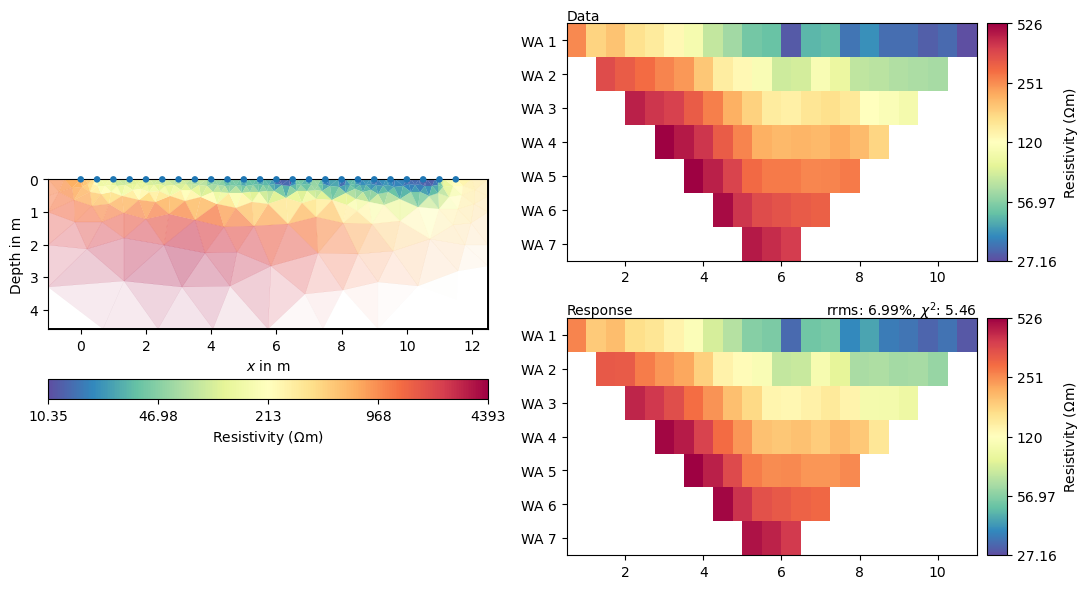

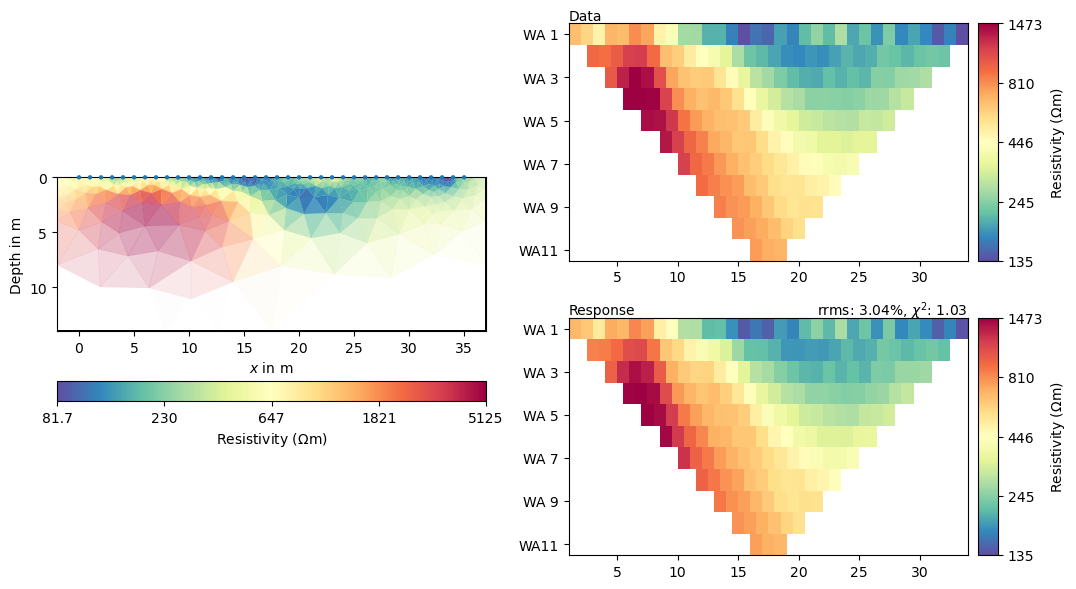

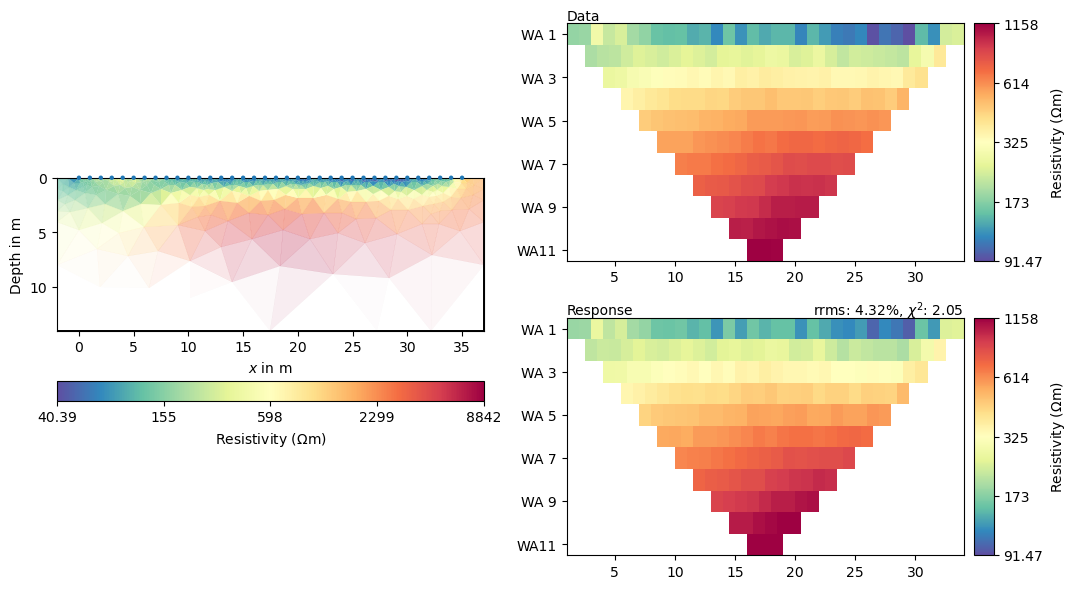

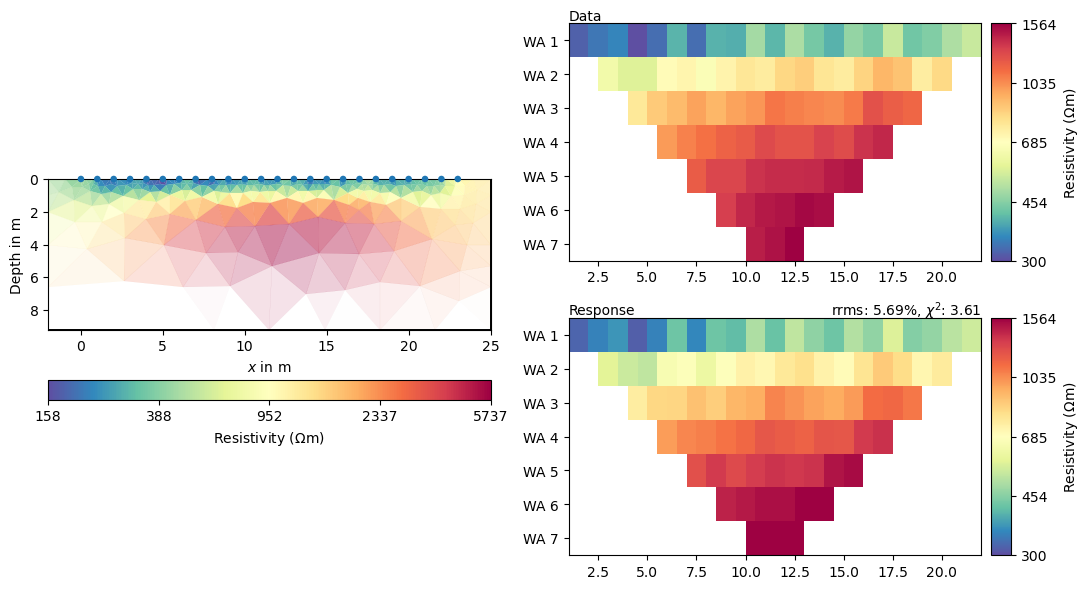

In [14]:
for item in parsons:
    mgr = ert.ERTManager(item)
    mgr.invert(item, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)
    mgr.showResultAndFit()

In [73]:
pe02_v1_ws_norm = ert.load(dir + '12Aug/p02_camp_perp_pit_dd.dat')
pe02_v1_ws_norm_recip = ert.load(dir + '10Aug/WS/normal+recip/p02_v1_ws.dat')
pe02_v1_ws_recip = ert.load(dir + '10Aug/WS/recip/p02_v1_ws_recip.dat')

12/08/24 - 22:18:32 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
12/08/24 - 22:18:32 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
12/08/24 - 22:18:32 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


12/08/24 - 22:18:51 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.


12/08/24 - 22:18:53 - pyGIMLi - INFO - Save RVector binary
12/08/24 - 22:18:53 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\13151292994750195978
12/08/24 - 22:18:53 - pyGIMLi - INFO - Save RVector binary
12/08/24 - 22:18:53 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\14189781409204440884


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2696fcdb750>)

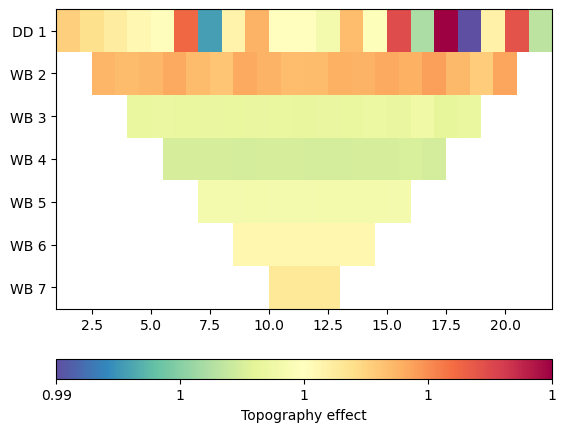

In [74]:
pe02_v1_ws_norm['k'] = ert.createGeometricFactors(pe02_v1_ws_norm, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(pe02_v1_ws_norm)
ert.showData(pe02_v1_ws_norm, vals=k0/pe02_v1_ws_norm['k'], label='Topography effect')

11/08/24 - 00:53:47 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
11/08/24 - 00:53:56 - pyGIMLi - INFO - Save RVector binary
11/08/24 - 00:53:56 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\12820174691667286411
11/08/24 - 00:53:56 - pyGIMLi - INFO - Save RVector binary
11/08/24 - 00:53:56 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\14035414363630844272


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2695f00a210>)

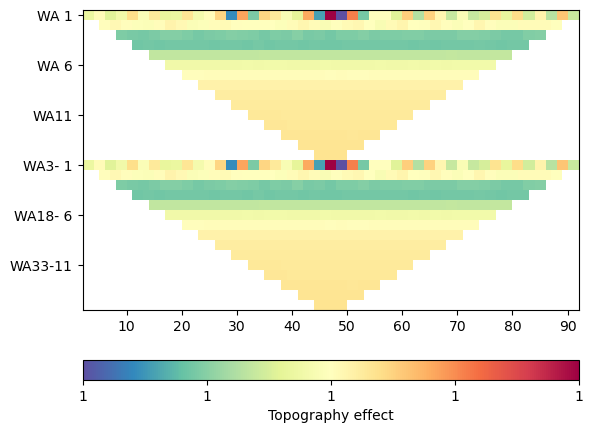

In [22]:
pe02_v1_ws_norm_recip['k'] = ert.createGeometricFactors(pe02_v1_ws_norm_recip, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(pe02_v1_ws_norm_recip)
ert.showData(pe02_v1_ws_norm_recip, vals=k0/pe02_v1_ws_norm_recip['k'], label='Topography effect')

11/08/24 - 00:54:44 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
11/08/24 - 00:54:52 - pyGIMLi - INFO - Save RVector binary
11/08/24 - 00:54:52 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\12743033274282518576
11/08/24 - 00:54:52 - pyGIMLi - INFO - Save RVector binary
11/08/24 - 00:54:52 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\11836125356567204064


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2695f119390>)

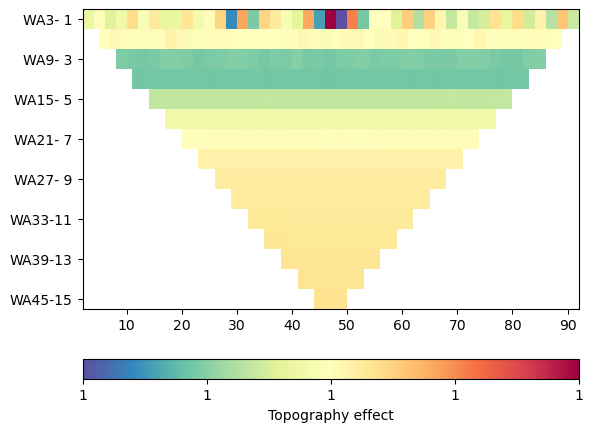

In [23]:
pe02_v1_ws_recip['k'] = ert.createGeometricFactors(pe02_v1_ws_recip, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(pe02_v1_ws_recip)
ert.showData(pe02_v1_ws_recip, vals=k0/pe02_v1_ws_recip['k'], label='Topography effect')

12/08/24 - 22:19:17 - pyGIMLi - CRITICAL - None.estimateError(C:\Users\Expedition\gimli\gimli\pygimli\physics\ert\ert.py:521)
We need (rhoa) and (k) in thedata to estimate data error.


Exception: We need (rhoa) and (k) in thedata to estimate data error.

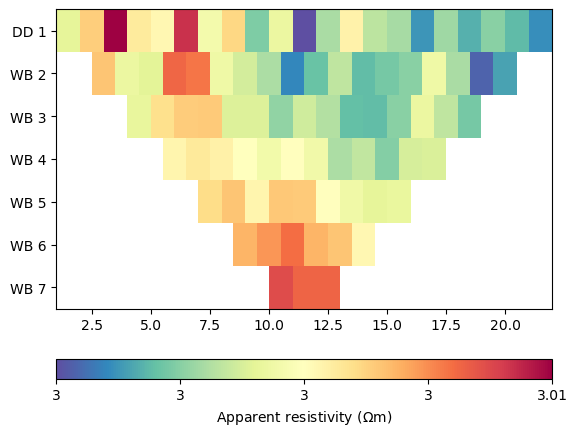

In [75]:
pe02_v1_ws_norm['err'] = ert.estimateError(pe02_v1_ws_norm, relativeError=0.03, absoluteUError=5e-5)
ert.show(pe02_v1_ws_norm, pe02_v1_ws_norm['err']*100)

pe02_v1_ws_norm_recip['err'] = ert.estimateError(pe02_v1_ws_norm_recip, relativeError=0.03, absoluteUError=5e-5)
ert.show(pe02_v1_ws_norm_recip, pe02_v1_ws_norm_recip['err']*100)

pe02_v1_ws_recip['err'] = ert.estimateError(pe02_v1_ws_recip, relativeError=0.03, absoluteUError=5e-5)
ert.show(pe02_v1_ws_recip, pe02_v1_ws_recip['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x269741aced0>)

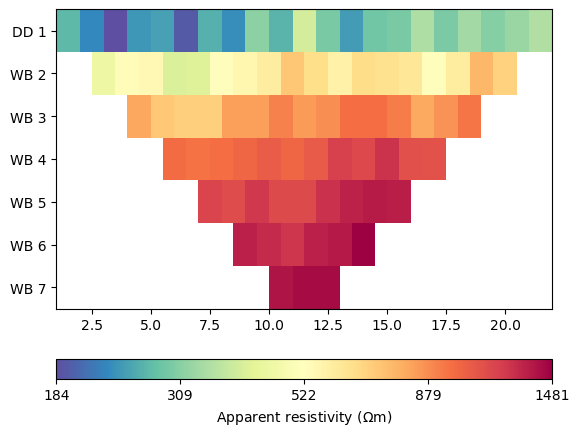

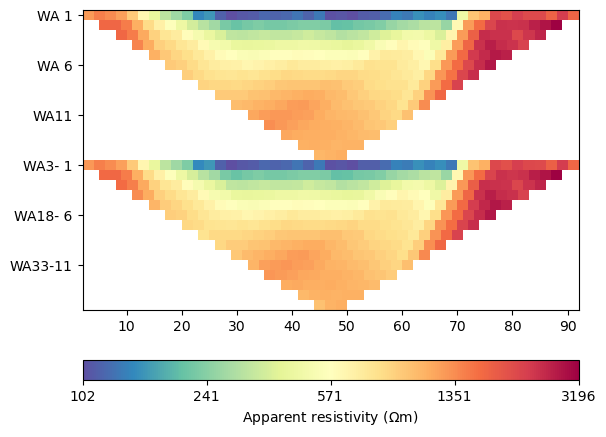

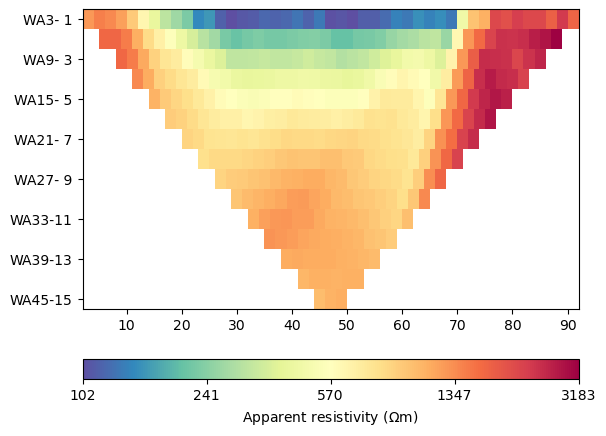

In [76]:
ert.showData(pe02_v1_ws_norm)
ert.showData(pe02_v1_ws_norm_recip)
ert.showData(pe02_v1_ws_recip)

12/08/24 - 22:19:46 - pyGIMLi - INFO - Found 2 regions.
12/08/24 - 22:19:46 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/08/24 - 22:19:46 - pyGIMLi - INFO - Found 2 regions.


12/08/24 - 22:19:46 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/08/24 - 22:19:46 - pyGIMLi - INFO - Creating forward mesh from region infos.
12/08/24 - 22:19:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
12/08/24 - 22:19:46 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1352 Cells: 2492 Boundaries: 1974
12/08/24 - 22:19:46 - pyGIMLi - INFO - Use median(data values)=781.2439999999999
12/08/24 - 22:19:46 - pyGIMLi - INFO - Created startmodel from forward operator: 412, min/max=781.244000/781.244000
12/08/24 - 22:19:46 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002696FA58680>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002696FA7C720>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002696F671B70>
min/max (data): 184/1481
min/max (error): 3%/3.01%
min/max (start model): 781/781
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  415.38
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   69.68 (dPhi = 81.84%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    6.34 (dPhi = 73.76%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    5.50 (dPhi = 7.91%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    5.49 (dPhi = -0.01%) lam: 20.0
#################

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x269747c1390>)

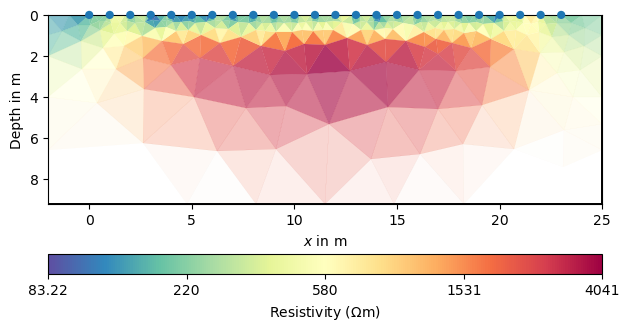

In [77]:
mgr.invert(pe02_v1_ws_norm, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)


mgr.showResult()

11/08/24 - 01:00:00 - pyGIMLi - INFO - Use median(data values)=814.725
11/08/24 - 01:00:00 - pyGIMLi - INFO - Created startmodel from forward operator: 1007, min/max=814.725000/814.725000
11/08/24 - 01:00:00 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002695F0C2B60>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002695F0DEED0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002695F0C18F0>
min/max (data): 102/3196
min/max (error): 3%/3.01%
min/max (start model): 815/815
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  837.82
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   45.23 (dPhi = 94.34%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   23.52 (dPhi = 45.95%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.60 (dPhi = 78.55%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.21 (dPhi = 23.36%) lam: 20.0
----------------

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x2695e069390>)

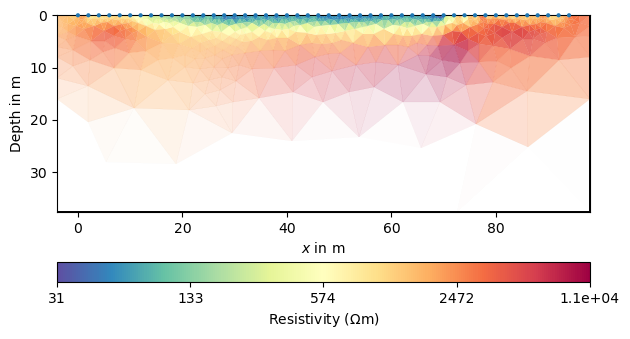

In [27]:
mgr.invert(pe02_v1_ws_norm_recip, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)


mgr.showResult()

11/08/24 - 01:01:27 - pyGIMLi - INFO - Use median(data values)=818.424
11/08/24 - 01:01:27 - pyGIMLi - INFO - Created startmodel from forward operator: 1007, min/max=818.424000/818.424000
11/08/24 - 01:01:27 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002695F0C2B60>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002695F0DEED0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002695F0C18F0>
min/max (data): 102/3183
min/max (error): 3%/3.01%
min/max (start model): 818/818
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  841.39
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   42.62 (dPhi = 94.55%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   20.71 (dPhi = 46.79%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.30 (dPhi = 70.91%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.89 (dPhi = 5.55%) lam: 20.0
-----------------

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x2695f268250>)

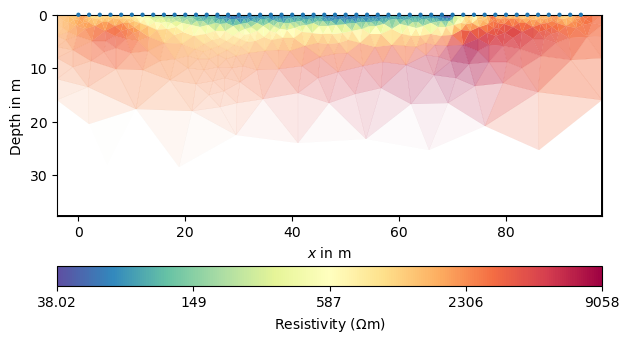

In [28]:
mgr.invert(pe02_v1_ws_recip, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)


mgr.showResult()

In [30]:
pe02_v1_dd = ert.load(dir + '10Aug/DD/p02_v1_dd_norma.dat')


11/08/24 - 01:03:40 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


11/08/24 - 01:34:00 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
11/08/24 - 01:34:03 - pyGIMLi - INFO - Save RVector binary
11/08/24 - 01:34:03 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\15517595850724917953
11/08/24 - 01:34:03 - pyGIMLi - INFO - Save RVector binary
11/08/24 - 01:34:03 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\10612938398350226468


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x26967eebfd0>)

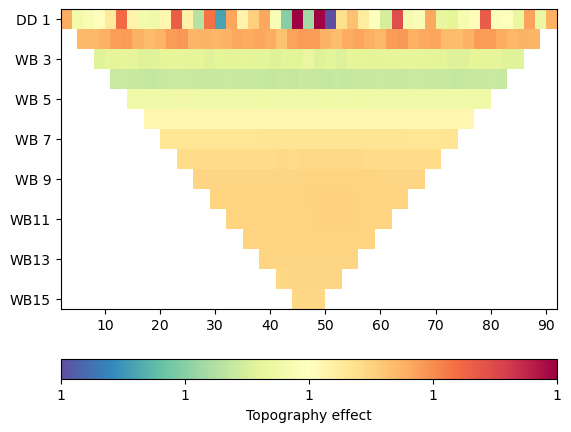

In [31]:
pe02_v1_dd['k'] = ert.createGeometricFactors(pe02_v1_dd, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(pe02_v1_dd)
ert.showData(pe02_v1_dd, vals=k0/pe02_v1_dd['k'], label='Topography effect')

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x26967f36990>)

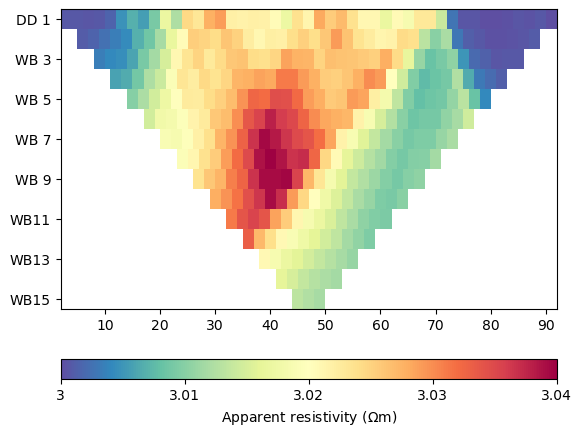

In [32]:
pe02_v1_dd['err'] = ert.estimateError(pe02_v1_dd, relativeError=0.03, absoluteUError=5e-5)
ert.show(pe02_v1_dd, pe02_v1_dd['err']*100)

11/08/24 - 01:36:00 - pyGIMLi - INFO - Found 2 regions.
11/08/24 - 01:36:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
11/08/24 - 01:36:00 - pyGIMLi - INFO - Found 2 regions.
11/08/24 - 01:36:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
11/08/24 - 01:36:00 - pyGIMLi - INFO - Creating forward mesh from region infos.
11/08/24 - 01:36:00 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
11/08/24 - 01:36:00 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2615 Cells: 4872 Boundaries: 3832
11/08/24 - 01:36:00 - pyGIMLi - INFO - Use median(data values)=528.5015000000001
11/08/24 - 01:36:00 - pyGIMLi - INFO - Created startmodel from forward operator: 1007, min/max=528.501500/528.501500
11/08/24 - 01:36:00 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000026967F1F1F0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000026967F62E80>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002695F02A070>
min/max (data): 58.76/3857
min/max (error): 3%/3.04%
min/max (start model): 528/528
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  974.92
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  194.30 (dPhi = 79.58%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   25.71 (dPhi = 83.24%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.75 (dPhi = 67.15%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.48 (dPhi = 3.71%) lam: 20.0
---------------

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x2696a1e0450>)

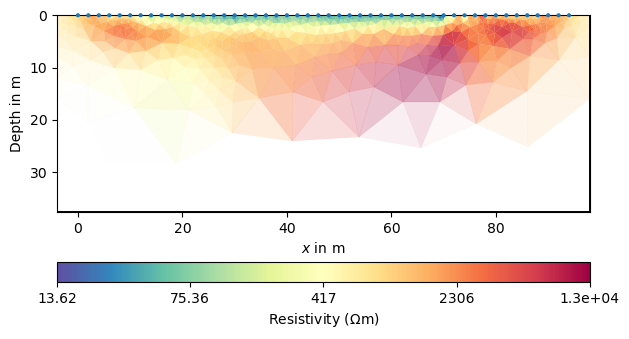

In [33]:
mgr.invert(pe02_v1_dd, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)


mgr.showResult()

11/08/24 - 01:43:11 - pyGIMLi - INFO - Saving inversion results to: C:/Users/Expedition/Desktop/expedition2024/pygimli/all_inversions/INV_TI24_PE02_VS_DD\ERTManager


('C:/Users/Expedition/Desktop/expedition2024/pygimli/all_inversions/INV_TI24_PE02_VS_DD\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

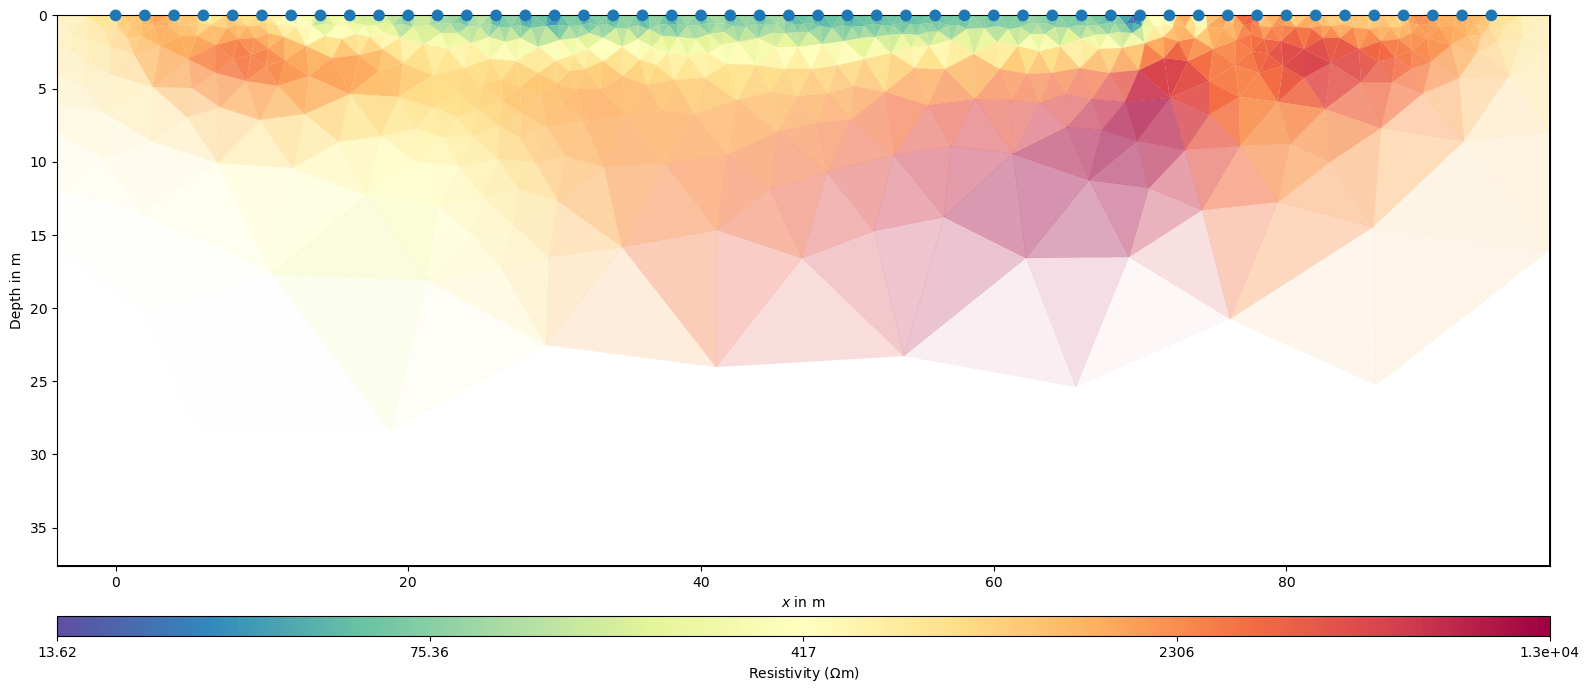

In [34]:
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_TI24_PE02_VS_DD')

01/08/24 - 11:11:16 - pyGIMLi - INFO - Found 2 regions.
01/08/24 - 11:11:16 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/08/24 - 11:11:16 - pyGIMLi - INFO - Found 2 regions.
01/08/24 - 11:11:16 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/08/24 - 11:11:16 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/08/24 - 11:11:16 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/08/24 - 11:11:16 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2521 Cells: 4696 Boundaries: 3694
01/08/24 - 11:11:16 - pyGIMLi - INFO - Use median(data values)=448.56
01/08/24 - 11:11:16 - pyGIMLi - INFO - Created startmodel from forward operator: 951, min/max=448.560000/448.560000
01/08/24 - 11:11:16 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C460DCCD10>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001C4607BC810>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001C45F98D2B0>
min/max (data): 22.12/2848
min/max (error): 3%/3.21%
min/max (start model): 449/449
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  900.17
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  105.64 (dPhi = 87.97%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   69.34 (dPhi = 33.29%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   42.76 (dPhi = 35.78%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   25.02 (dPhi = 30.94%) lam: 20.0
--------------

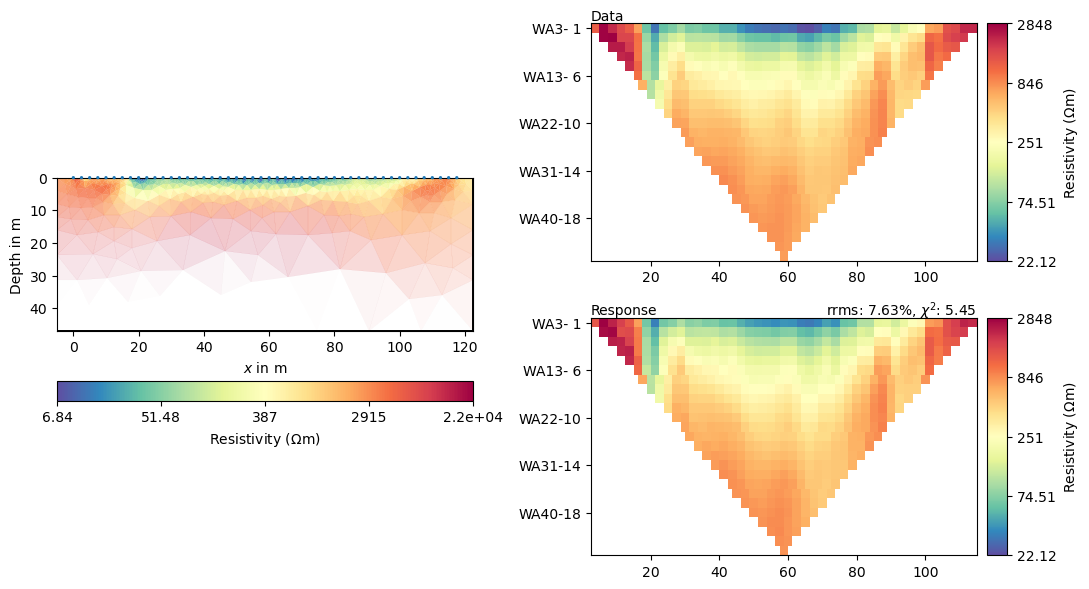

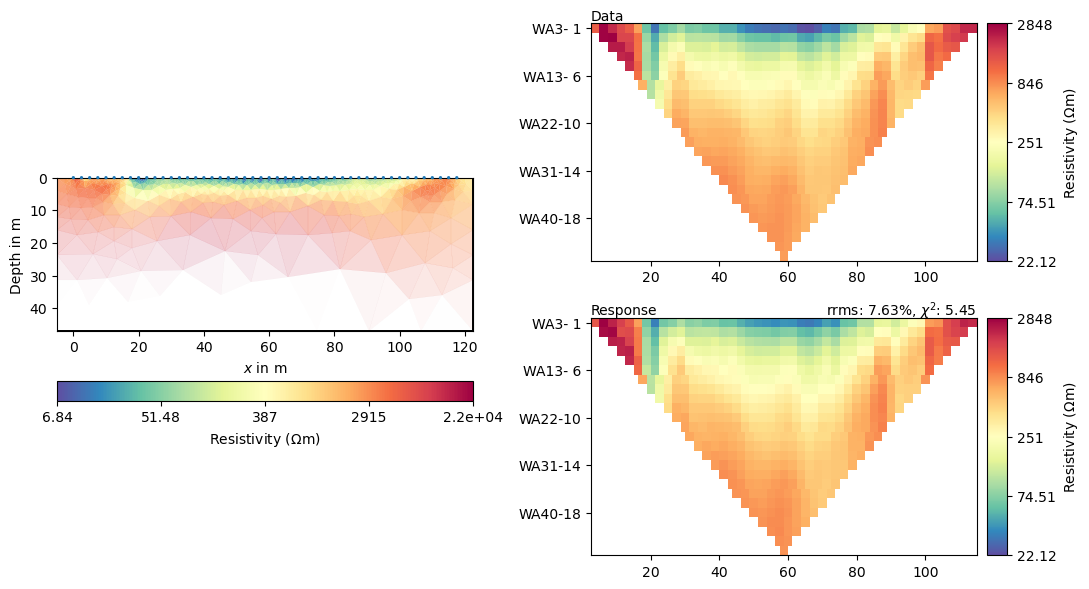

In [112]:
mgr.invert(data2024_long, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)


mgr.showResultAndFit()

01/08/24 - 11:12:18 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/pygimli/all_inversions/INV_Kamik2024_WS_long\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/pygimli/all_inversions/INV_Kamik2024_WS_long\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

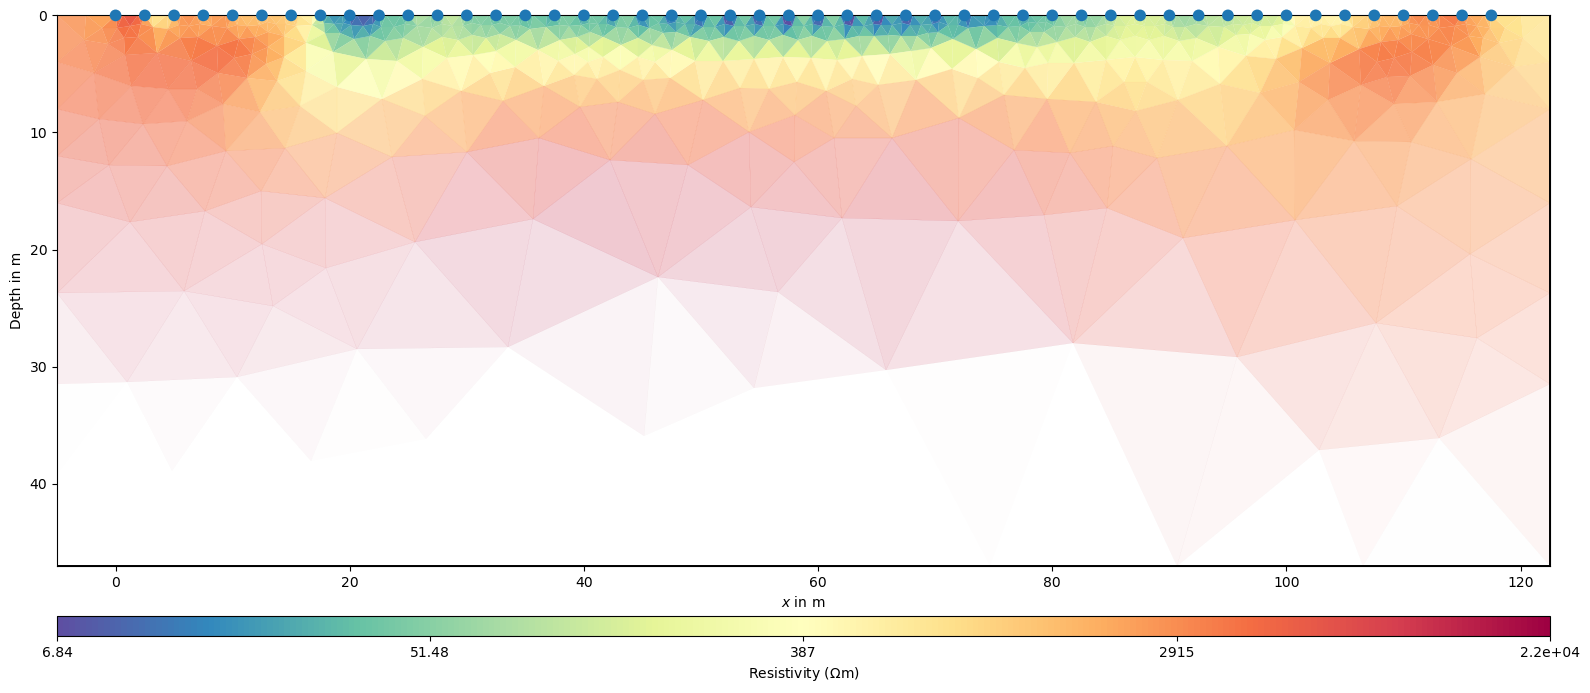

In [113]:
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_Kamik2024_WS_long')

In [94]:
mesh_kamik2023_ws = pg.load(dir+'pygimli/all_inversions/INV_Kamik2023_WS/ERTManager/resistivity-pd.bms')
res_kamik2023_ws = pg.load(dir+'pygimli/all_inversions/INV_Kamik2023_WS/ERTManager/resistivity.vector')
cov_kamik2023_ws = pg.load(dir+'pygimli/all_inversions/INV_Kamik2023_WS/ERTManager/resistivity-cov.vector')

mesh_kamik2024_ws = pg.load(dir+'pygimli/all_inversions/INV_Kamik2024_WS/ERTManager/resistivity-pd.bms')
res_kamik2024_ws = pg.load(dir+'pygimli/all_inversions/INV_Kamik2024_WS/ERTManager/resistivity.vector')
cov_kamik2024_ws = pg.load(dir+'pygimli/all_inversions/INV_Kamik2024_WS/ERTManager/resistivity-cov.vector')

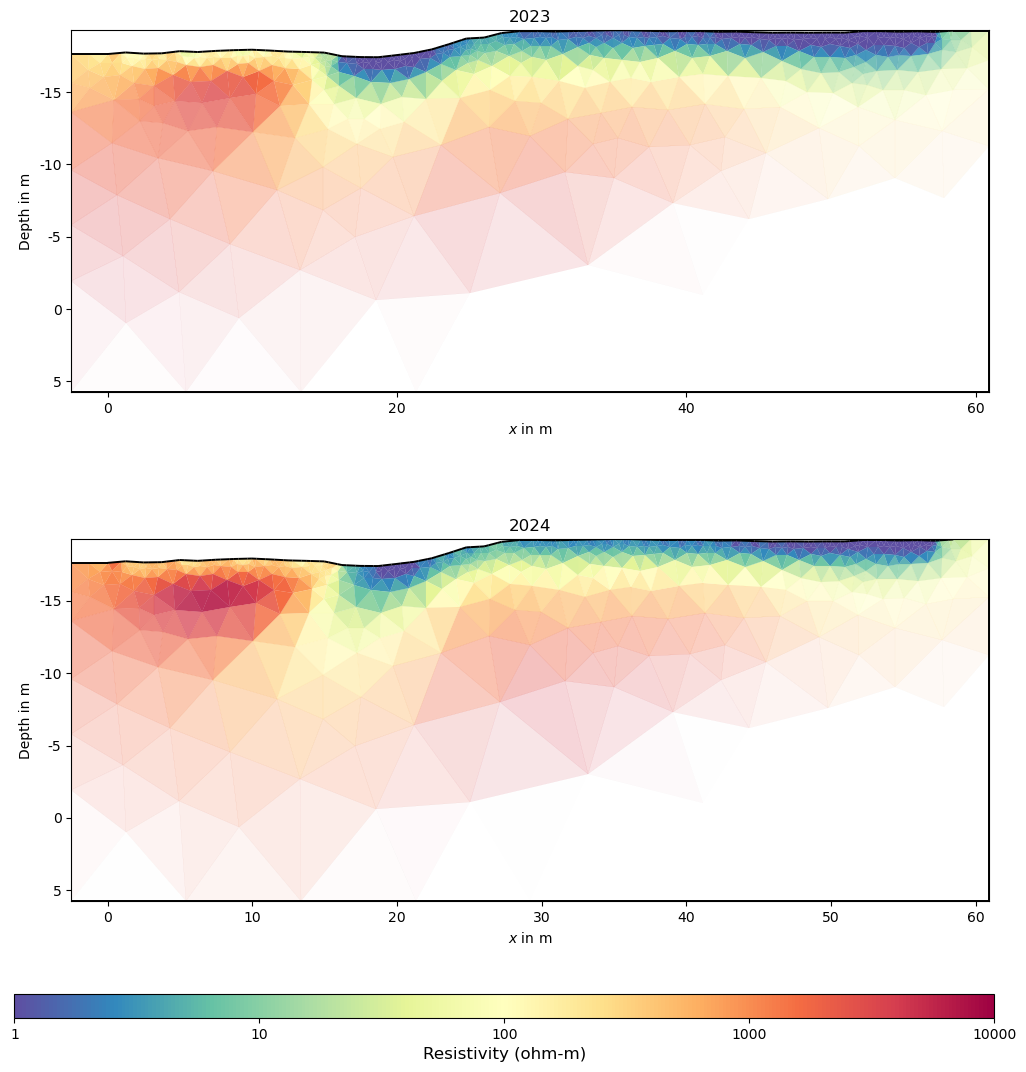

In [107]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pygimli as pg  # assuming pg is an alias for PyGIMLi
from matplotlib.ticker import MultipleLocator

# Define common normalization and colormap for linear scale
cmin = 10
cmax = 10000
cmap = "Spectral_r"



# Create a 1x2 grid of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot on the subplots with the common normalization and colormap
pg.show(mesh_kamik2023_ws, res_kamik2023_ws, cMap=cmap, ax=ax[0], colorBar=False, cMin=cmin, cMax=cmax,logScale=True, sharey = True, coverage=cov_kamik2023_ws)
pg.show(mesh_kamik2024_ws, res_kamik2024_ws, cMap=cmap, ax=ax[1], colorBar=False, cMin=cmin, cMax=cmax, logScale=True, sharey = True, coverage=cov_kamik2024_ws)



cax1 = fig.add_axes([0.01, 0.04, 0.98, 0.02])  
colorbar1 = pg.viewer.mpl.createColorBarOnly(ax=cax1, cMin=1, cMax=10000, logScale=True, cMap="Spectral_r")


ax[0].set_title('2023')
ax[1].set_title('2024')

#ax[0].set_ylim(-50, 15)
#ax[1].set_ylim(-50, 15)



#ax[0].set_aspect(1.06)

ax[0].xaxis.set_major_locator(MultipleLocator(20))
ax[0].xaxis.set_major_locator(MultipleLocator(20))


cax1.set_xlabel('Resistivity (ohm-m)', fontsize=12)

plt.show()
